In [1]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pickle
import seaborn as sns
import datetime as dt
from model import StockEnv,get_scaler, play_one_episode, LinearModel, DQNAgent
from tqdm.notebook import tqdm
import pyfolio as pf
%matplotlib inline

C:\Users\User\anaconda3\envs\MyDjango\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


Stock name: RDS-B
Start: 2013-02-19 00:00:00, End: 2020-12-31 00:00:00
Training data: 1227 
Tsesting data: 756 


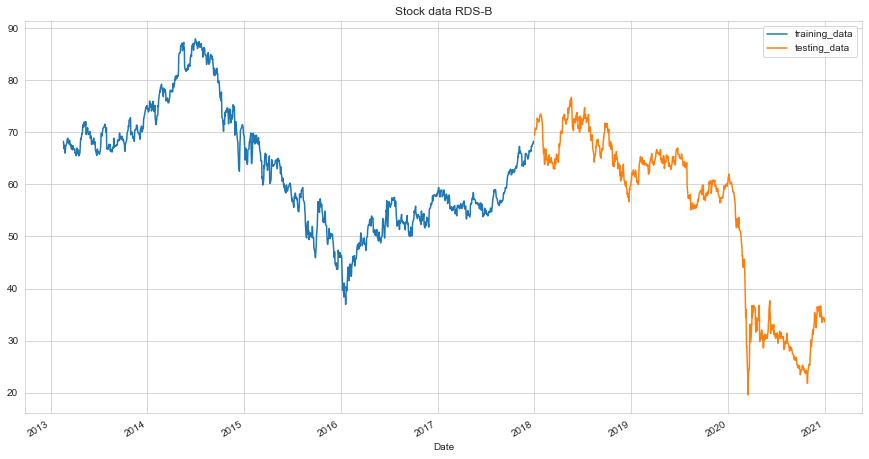

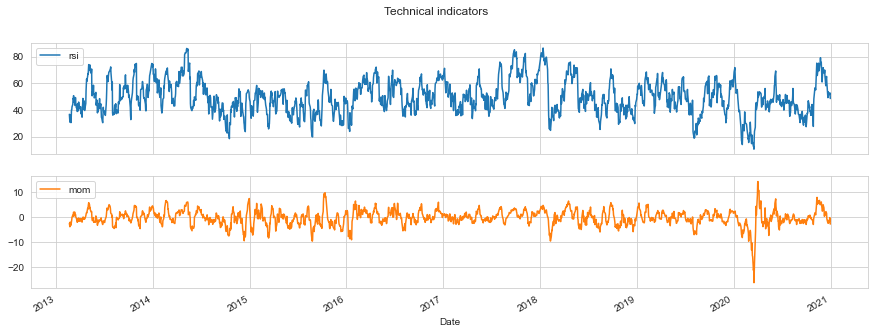

In [10]:
stock_name = 'rds-b'.upper()
industry = 'Energy'
stock_data = pd.read_csv(f'../train_test_data/{stock_name}.csv', index_col=['Date'], parse_dates=True)

train_data = stock_data.loc[:'2018-01-01']
test_data = stock_data.loc['2018-01-01':]

print(f'Stock name: {stock_name}')
print(f'Start: {stock_data.index[0]}, End: {stock_data.index[-1]}')
print(f'Training data: {len(train_data)} ')
print(f'Tsesting data: {len(test_data)} ')

sns.set_style('whitegrid')
train_data['Adj Close'].plot(label='training_data', figsize=(15,8));
test_data['Adj Close'].plot(label='testing_data');
plt.title('Stock data '+ stock_name)
plt.legend();
plt.show()

stock_data[['rsi', 'mom']].plot(subplots=True, figsize=(15,5), title='Technical indicators');
plt.show()




In [3]:
num_episodes = 2000
batch_size = 32
capital = 1000
data = stock_data['Adj Close'].values
n_timesteps = data.shape[0]


env = StockEnv(train_data, capital)
state_size = env.state_dim
action_size = 2
agent = DQNAgent(state_size, action_size)
scaler = get_scaler(env)

  0%|          | 0/2000 [00:00<?, ?it/s]

episode: 1/2000, episode end value: 1091.04, duration: 0:00:00.386089
episode: 2/2000, episode end value: 1069.72, duration: 0:00:00.363085
episode: 3/2000, episode end value: 1060.26, duration: 0:00:00.410093
episode: 4/2000, episode end value: 1076.56, duration: 0:00:00.343077
episode: 5/2000, episode end value: 1064.47, duration: 0:00:00.343078
episode: 6/2000, episode end value: 1068.96, duration: 0:00:00.337077
episode: 7/2000, episode end value: 1131.31, duration: 0:00:00.280064
episode: 8/2000, episode end value: 1072.63, duration: 0:00:00.316072
episode: 9/2000, episode end value: 1071.66, duration: 0:00:00.300068
episode: 10/2000, episode end value: 1106.70, duration: 0:00:00.335079
episode: 11/2000, episode end value: 1065.72, duration: 0:00:00.266057
episode: 12/2000, episode end value: 1088.80, duration: 0:00:00.287067
episode: 13/2000, episode end value: 1116.82, duration: 0:00:00.380086
episode: 14/2000, episode end value: 1089.96, duration: 0:00:00.315069
episode: 15/200

episode: 117/2000, episode end value: 1103.58, duration: 0:00:00.379086
episode: 118/2000, episode end value: 1090.27, duration: 0:00:00.308070
episode: 119/2000, episode end value: 1099.67, duration: 0:00:00.388889
episode: 120/2000, episode end value: 1114.85, duration: 0:00:00.314070
episode: 121/2000, episode end value: 1093.41, duration: 0:00:00.410093
episode: 122/2000, episode end value: 1031.93, duration: 0:00:00.418810
episode: 123/2000, episode end value: 1068.53, duration: 0:00:00.391829
episode: 124/2000, episode end value: 1085.85, duration: 0:00:00.390087
episode: 125/2000, episode end value: 1089.52, duration: 0:00:00.404091
episode: 126/2000, episode end value: 1091.15, duration: 0:00:00.459100
episode: 127/2000, episode end value: 1095.68, duration: 0:00:00.448101
episode: 128/2000, episode end value: 1097.01, duration: 0:00:00.411574
episode: 129/2000, episode end value: 1107.76, duration: 0:00:00.368089
episode: 130/2000, episode end value: 1074.52, duration: 0:00:00

episode: 231/2000, episode end value: 1106.66, duration: 0:00:00.462457
episode: 232/2000, episode end value: 1171.75, duration: 0:00:00.444764
episode: 233/2000, episode end value: 1117.26, duration: 0:00:00.439097
episode: 234/2000, episode end value: 1063.35, duration: 0:00:00.408087
episode: 235/2000, episode end value: 1076.15, duration: 0:00:00.401092
episode: 236/2000, episode end value: 1099.16, duration: 0:00:00.460105
episode: 237/2000, episode end value: 1076.08, duration: 0:00:00.466105
episode: 238/2000, episode end value: 1162.27, duration: 0:00:00.453104
episode: 239/2000, episode end value: 1061.84, duration: 0:00:00.518117
episode: 240/2000, episode end value: 1151.31, duration: 0:00:00.506114
episode: 241/2000, episode end value: 1070.12, duration: 0:00:00.476110
episode: 242/2000, episode end value: 1064.06, duration: 0:00:00.474107
episode: 243/2000, episode end value: 1141.73, duration: 0:00:00.490112
episode: 244/2000, episode end value: 1060.58, duration: 0:00:00

episode: 345/2000, episode end value: 1057.71, duration: 0:00:00.443101
episode: 346/2000, episode end value: 1140.21, duration: 0:00:00.444100
episode: 347/2000, episode end value: 1139.09, duration: 0:00:00.421095
episode: 348/2000, episode end value: 1096.73, duration: 0:00:00.438098
episode: 349/2000, episode end value: 1120.55, duration: 0:00:00.440100
episode: 350/2000, episode end value: 1125.33, duration: 0:00:00.464104
episode: 351/2000, episode end value: 1090.90, duration: 0:00:00.403096
episode: 352/2000, episode end value: 1114.64, duration: 0:00:00.439097
episode: 353/2000, episode end value: 1089.86, duration: 0:00:00.398110
episode: 354/2000, episode end value: 1124.91, duration: 0:00:00.447101
episode: 355/2000, episode end value: 1113.96, duration: 0:00:00.386086
episode: 356/2000, episode end value: 1204.36, duration: 0:00:00.427100
episode: 357/2000, episode end value: 1102.09, duration: 0:00:00.352079
episode: 358/2000, episode end value: 1133.49, duration: 0:00:00

episode: 459/2000, episode end value: 1099.54, duration: 0:00:00.504112
episode: 460/2000, episode end value: 1070.71, duration: 0:00:00.500113
episode: 461/2000, episode end value: 1166.90, duration: 0:00:00.529120
episode: 462/2000, episode end value: 1127.93, duration: 0:00:00.462107
episode: 463/2000, episode end value: 1085.08, duration: 0:00:00.465618
episode: 464/2000, episode end value: 1102.07, duration: 0:00:00.556649
episode: 465/2000, episode end value: 1048.00, duration: 0:00:00.525117
episode: 466/2000, episode end value: 1122.83, duration: 0:00:00.489112
episode: 467/2000, episode end value: 1053.61, duration: 0:00:00.508111
episode: 468/2000, episode end value: 1093.92, duration: 0:00:00.498117
episode: 469/2000, episode end value: 1127.25, duration: 0:00:00.446100
episode: 470/2000, episode end value: 1053.74, duration: 0:00:00.363083
episode: 471/2000, episode end value: 1133.82, duration: 0:00:00.445102
episode: 472/2000, episode end value: 1065.08, duration: 0:00:00

episode: 573/2000, episode end value: 1084.79, duration: 0:00:00.394088
episode: 574/2000, episode end value: 1093.86, duration: 0:00:00.425095
episode: 575/2000, episode end value: 1088.02, duration: 0:00:00.441750
episode: 576/2000, episode end value: 1084.46, duration: 0:00:00.426420
episode: 577/2000, episode end value: 1170.80, duration: 0:00:00.488111
episode: 578/2000, episode end value: 1153.07, duration: 0:00:00.421094
episode: 579/2000, episode end value: 1143.99, duration: 0:00:00.429098
episode: 580/2000, episode end value: 1170.99, duration: 0:00:00.447103
episode: 581/2000, episode end value: 1084.67, duration: 0:00:00.456104
episode: 582/2000, episode end value: 1076.60, duration: 0:00:00.466104
episode: 583/2000, episode end value: 1103.42, duration: 0:00:00.435096
episode: 584/2000, episode end value: 1106.04, duration: 0:00:00.431099
episode: 585/2000, episode end value: 1198.83, duration: 0:00:00.397090
episode: 586/2000, episode end value: 1154.17, duration: 0:00:00

episode: 687/2000, episode end value: 1083.44, duration: 0:00:00.478108
episode: 688/2000, episode end value: 1064.74, duration: 0:00:00.411985
episode: 689/2000, episode end value: 1093.19, duration: 0:00:00.417873
episode: 690/2000, episode end value: 1078.70, duration: 0:00:00.477107
episode: 691/2000, episode end value: 1116.15, duration: 0:00:00.390091
episode: 692/2000, episode end value: 1076.92, duration: 0:00:00.450102
episode: 693/2000, episode end value: 1064.54, duration: 0:00:00.435098
episode: 694/2000, episode end value: 1135.70, duration: 0:00:00.463108
episode: 695/2000, episode end value: 1085.29, duration: 0:00:00.445100
episode: 696/2000, episode end value: 1096.89, duration: 0:00:00.416093
episode: 697/2000, episode end value: 1067.47, duration: 0:00:00.450209
episode: 698/2000, episode end value: 1141.03, duration: 0:00:00.439152
episode: 699/2000, episode end value: 1117.89, duration: 0:00:00.414509
episode: 700/2000, episode end value: 1075.06, duration: 0:00:00

episode: 801/2000, episode end value: 1094.10, duration: 0:00:00.457103
episode: 802/2000, episode end value: 1069.30, duration: 0:00:00.420097
episode: 803/2000, episode end value: 1076.26, duration: 0:00:00.462101
episode: 804/2000, episode end value: 1066.12, duration: 0:00:00.429096
episode: 805/2000, episode end value: 1082.63, duration: 0:00:00.460102
episode: 806/2000, episode end value: 1158.08, duration: 0:00:00.404091
episode: 807/2000, episode end value: 1109.57, duration: 0:00:00.315073
episode: 808/2000, episode end value: 1095.66, duration: 0:00:00.332080
episode: 809/2000, episode end value: 1131.68, duration: 0:00:00.334079
episode: 810/2000, episode end value: 1112.56, duration: 0:00:00.346057
episode: 811/2000, episode end value: 1180.71, duration: 0:00:00.444640
episode: 812/2000, episode end value: 1057.98, duration: 0:00:00.400995
episode: 813/2000, episode end value: 1123.84, duration: 0:00:00.380616
episode: 814/2000, episode end value: 1087.82, duration: 0:00:00

episode: 915/2000, episode end value: 1045.45, duration: 0:00:00.460103
episode: 916/2000, episode end value: 1077.46, duration: 0:00:00.436099
episode: 917/2000, episode end value: 1114.42, duration: 0:00:00.389090
episode: 918/2000, episode end value: 1063.20, duration: 0:00:00.378085
episode: 919/2000, episode end value: 1072.57, duration: 0:00:00.345079
episode: 920/2000, episode end value: 1086.72, duration: 0:00:00.348083
episode: 921/2000, episode end value: 1097.81, duration: 0:00:00.380084
episode: 922/2000, episode end value: 1086.22, duration: 0:00:00.387087
episode: 923/2000, episode end value: 1077.98, duration: 0:00:00.422096
episode: 924/2000, episode end value: 1071.09, duration: 0:00:00.375084
episode: 925/2000, episode end value: 1082.63, duration: 0:00:00.365081
episode: 926/2000, episode end value: 1095.86, duration: 0:00:00.409095
episode: 927/2000, episode end value: 1070.67, duration: 0:00:00.420094
episode: 928/2000, episode end value: 1131.60, duration: 0:00:00

episode: 1029/2000, episode end value: 1056.47, duration: 0:00:00.395089
episode: 1030/2000, episode end value: 1063.58, duration: 0:00:00.409090
episode: 1031/2000, episode end value: 1165.90, duration: 0:00:00.361082
episode: 1032/2000, episode end value: 1087.92, duration: 0:00:00.435103
episode: 1033/2000, episode end value: 1037.71, duration: 0:00:00.415093
episode: 1034/2000, episode end value: 1117.77, duration: 0:00:00.433097
episode: 1035/2000, episode end value: 1072.78, duration: 0:00:00.350080
episode: 1036/2000, episode end value: 1101.35, duration: 0:00:00.429099
episode: 1037/2000, episode end value: 1068.28, duration: 0:00:00.455104
episode: 1038/2000, episode end value: 1214.85, duration: 0:00:00.426095
episode: 1039/2000, episode end value: 1052.04, duration: 0:00:00.392088
episode: 1040/2000, episode end value: 1102.89, duration: 0:00:00.422096
episode: 1041/2000, episode end value: 1113.21, duration: 0:00:00.457104
episode: 1042/2000, episode end value: 1080.06, dur

episode: 1142/2000, episode end value: 1054.66, duration: 0:00:00.452100
episode: 1143/2000, episode end value: 1190.83, duration: 0:00:00.437100
episode: 1144/2000, episode end value: 1092.97, duration: 0:00:00.358080
episode: 1145/2000, episode end value: 1152.07, duration: 0:00:00.258056
episode: 1146/2000, episode end value: 1167.39, duration: 0:00:00.386088
episode: 1147/2000, episode end value: 1103.22, duration: 0:00:00.378087
episode: 1148/2000, episode end value: 1102.84, duration: 0:00:00.416094
episode: 1149/2000, episode end value: 1111.24, duration: 0:00:00.361082
episode: 1150/2000, episode end value: 1110.04, duration: 0:00:00.457102
episode: 1151/2000, episode end value: 1096.66, duration: 0:00:00.516118
episode: 1152/2000, episode end value: 1141.68, duration: 0:00:00.496109
episode: 1153/2000, episode end value: 1128.78, duration: 0:00:00.359082
episode: 1154/2000, episode end value: 1097.69, duration: 0:00:00.520115
episode: 1155/2000, episode end value: 1087.95, dur

episode: 1255/2000, episode end value: 1073.35, duration: 0:00:00.418095
episode: 1256/2000, episode end value: 1120.64, duration: 0:00:00.451100
episode: 1257/2000, episode end value: 1161.17, duration: 0:00:00.429097
episode: 1258/2000, episode end value: 1048.50, duration: 0:00:00.448100
episode: 1259/2000, episode end value: 1091.68, duration: 0:00:00.467106
episode: 1260/2000, episode end value: 1074.92, duration: 0:00:00.437098
episode: 1261/2000, episode end value: 1089.91, duration: 0:00:00.398091
episode: 1262/2000, episode end value: 1075.27, duration: 0:00:00.428098
episode: 1263/2000, episode end value: 1065.60, duration: 0:00:00.456106
episode: 1264/2000, episode end value: 1101.17, duration: 0:00:00.458102
episode: 1265/2000, episode end value: 1091.41, duration: 0:00:00.433765
episode: 1266/2000, episode end value: 1061.07, duration: 0:00:00.370084
episode: 1267/2000, episode end value: 1052.80, duration: 0:00:00.477104
episode: 1268/2000, episode end value: 1060.28, dur

episode: 1368/2000, episode end value: 1156.72, duration: 0:00:00.375087
episode: 1369/2000, episode end value: 1116.37, duration: 0:00:00.375086
episode: 1370/2000, episode end value: 1093.98, duration: 0:00:00.443101
episode: 1371/2000, episode end value: 1130.61, duration: 0:00:00.406091
episode: 1372/2000, episode end value: 1084.92, duration: 0:00:00.317072
episode: 1373/2000, episode end value: 1140.20, duration: 0:00:00.324071
episode: 1374/2000, episode end value: 1139.94, duration: 0:00:00.337102
episode: 1375/2000, episode end value: 1099.07, duration: 0:00:00.383085
episode: 1376/2000, episode end value: 1129.94, duration: 0:00:00.419095
episode: 1377/2000, episode end value: 1051.59, duration: 0:00:00.338075
episode: 1378/2000, episode end value: 1091.00, duration: 0:00:00.411092
episode: 1379/2000, episode end value: 1109.34, duration: 0:00:00.370084
episode: 1380/2000, episode end value: 1111.52, duration: 0:00:00.430098
episode: 1381/2000, episode end value: 1083.07, dur

episode: 1481/2000, episode end value: 1171.19, duration: 0:00:00.355082
episode: 1482/2000, episode end value: 1105.14, duration: 0:00:00.369082
episode: 1483/2000, episode end value: 1081.41, duration: 0:00:00.369085
episode: 1484/2000, episode end value: 1104.14, duration: 0:00:00.352079
episode: 1485/2000, episode end value: 1145.14, duration: 0:00:00.398090
episode: 1486/2000, episode end value: 1111.94, duration: 0:00:00.425095
episode: 1487/2000, episode end value: 1102.98, duration: 0:00:00.342077
episode: 1488/2000, episode end value: 1077.92, duration: 0:00:00.326074
episode: 1489/2000, episode end value: 1081.93, duration: 0:00:00.344077
episode: 1490/2000, episode end value: 1175.46, duration: 0:00:00.335076
episode: 1491/2000, episode end value: 1098.28, duration: 0:00:00.313071
episode: 1492/2000, episode end value: 1133.94, duration: 0:00:00.314069
episode: 1493/2000, episode end value: 1077.37, duration: 0:00:00.300069
episode: 1494/2000, episode end value: 1116.10, dur

episode: 1594/2000, episode end value: 1166.17, duration: 0:00:00.336074
episode: 1595/2000, episode end value: 1158.11, duration: 0:00:00.367086
episode: 1596/2000, episode end value: 1129.60, duration: 0:00:00.343076
episode: 1597/2000, episode end value: 1049.45, duration: 0:00:00.310071
episode: 1598/2000, episode end value: 1143.19, duration: 0:00:00.339082
episode: 1599/2000, episode end value: 1091.34, duration: 0:00:00.333071
episode: 1600/2000, episode end value: 1082.21, duration: 0:00:00.303066
episode: 1601/2000, episode end value: 1116.45, duration: 0:00:00.322075
episode: 1602/2000, episode end value: 1119.34, duration: 0:00:00.296068
episode: 1603/2000, episode end value: 1082.27, duration: 0:00:00.303070
episode: 1604/2000, episode end value: 1110.68, duration: 0:00:00.335075
episode: 1605/2000, episode end value: 1088.11, duration: 0:00:00.311354
episode: 1606/2000, episode end value: 1086.94, duration: 0:00:00.293075
episode: 1607/2000, episode end value: 1111.96, dur

episode: 1707/2000, episode end value: 1124.89, duration: 0:00:00.299068
episode: 1708/2000, episode end value: 1167.52, duration: 0:00:00.313070
episode: 1709/2000, episode end value: 1075.72, duration: 0:00:00.364083
episode: 1710/2000, episode end value: 1121.64, duration: 0:00:00.325071
episode: 1711/2000, episode end value: 1090.87, duration: 0:00:00.286064
episode: 1712/2000, episode end value: 1139.23, duration: 0:00:00.315070
episode: 1713/2000, episode end value: 1079.49, duration: 0:00:00.309069
episode: 1714/2000, episode end value: 1149.73, duration: 0:00:00.311071
episode: 1715/2000, episode end value: 1144.79, duration: 0:00:00.311070
episode: 1716/2000, episode end value: 1165.15, duration: 0:00:00.345074
episode: 1717/2000, episode end value: 1125.33, duration: 0:00:00.325077
episode: 1718/2000, episode end value: 1078.67, duration: 0:00:00.324070
episode: 1719/2000, episode end value: 1125.18, duration: 0:00:00.312071
episode: 1720/2000, episode end value: 1082.14, dur

episode: 1820/2000, episode end value: 1152.41, duration: 0:00:00.344079
episode: 1821/2000, episode end value: 1066.86, duration: 0:00:00.304072
episode: 1822/2000, episode end value: 1075.65, duration: 0:00:00.307070
episode: 1823/2000, episode end value: 1053.73, duration: 0:00:00.304069
episode: 1824/2000, episode end value: 1055.82, duration: 0:00:00.293063
episode: 1825/2000, episode end value: 1087.43, duration: 0:00:00.284334
episode: 1826/2000, episode end value: 1118.91, duration: 0:00:00.273237
episode: 1827/2000, episode end value: 1143.78, duration: 0:00:00.314152
episode: 1828/2000, episode end value: 1084.92, duration: 0:00:00.320070
episode: 1829/2000, episode end value: 1075.55, duration: 0:00:00.313073
episode: 1830/2000, episode end value: 1082.45, duration: 0:00:00.328071
episode: 1831/2000, episode end value: 1059.47, duration: 0:00:00.247055
episode: 1832/2000, episode end value: 1082.63, duration: 0:00:00.325075
episode: 1833/2000, episode end value: 1081.15, dur

episode: 1933/2000, episode end value: 1134.87, duration: 0:00:00.248056
episode: 1934/2000, episode end value: 1136.22, duration: 0:00:00.290066
episode: 1935/2000, episode end value: 1065.64, duration: 0:00:00.288064
episode: 1936/2000, episode end value: 1120.58, duration: 0:00:00.288067
episode: 1937/2000, episode end value: 1139.13, duration: 0:00:00.265058
episode: 1938/2000, episode end value: 1140.77, duration: 0:00:00.274060
episode: 1939/2000, episode end value: 1053.36, duration: 0:00:00.236055
episode: 1940/2000, episode end value: 1156.64, duration: 0:00:00.243052
episode: 1941/2000, episode end value: 1097.55, duration: 0:00:00.211049
episode: 1942/2000, episode end value: 1104.74, duration: 0:00:00.250055
episode: 1943/2000, episode end value: 1075.49, duration: 0:00:00.246054
episode: 1944/2000, episode end value: 1095.66, duration: 0:00:00.241054
episode: 1945/2000, episode end value: 1121.04, duration: 0:00:00.252057
episode: 1946/2000, episode end value: 1079.34, dur

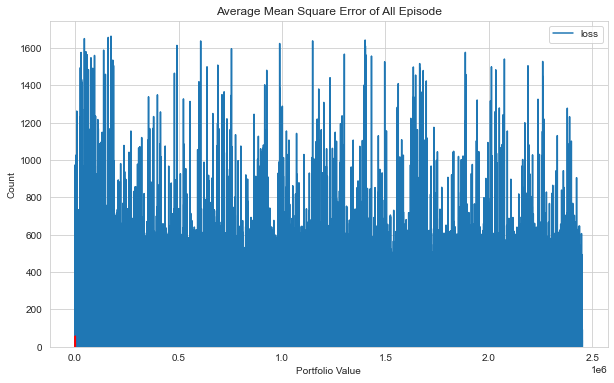

In [4]:
#train


mode = 'train'

portfolio_value = []



for e in tqdm(range(num_episodes)):
    t0 = datetime.now()
    val = play_one_episode(agent, env, mode, scaler)
    dt = datetime.now() - t0
    print(f"episode: {e + 1}/{num_episodes}, episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
    portfolio_value.append(val['portfolio_value'][-1]) 


if mode == 'train':
    # save the DQN
    agent.save(f'state_dict/{stock_name}.npz')

    # save the scaler
    with open(f'scaler/{stock_name}.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    # plot losses
    loss = agent.model.losses
    losses = pd.DataFrame(loss, columns=['loss'])
    losses.plot(figsize=(10,6))
    plt.title('Average Mean Square Error of All Episode')
    plt.xlabel('Step')
    plt.ylabel('Mean Square Error')

print(f'average reward: {np.mean(portfolio_value):.2f}, min: {np.min(portfolio_value):.2f}, max: {np.max(portfolio_value):.2f}')
sns.histplot(portfolio_value, bins=100, color='r', kde=True);
plt.xlabel('Portfolio Value');
plt.ylabel('Count');

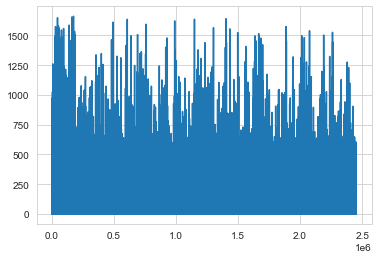

In [5]:
plt.plot(agent.model.losses)

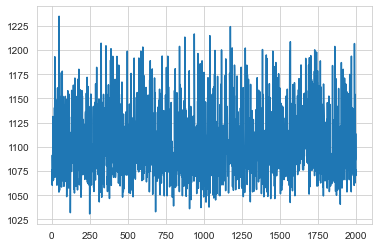

In [6]:
plt.plot(portfolio_value)

episode end value: 868.75, duration: 0:00:00.082033
Sell: 109 times, Buy: 113 times


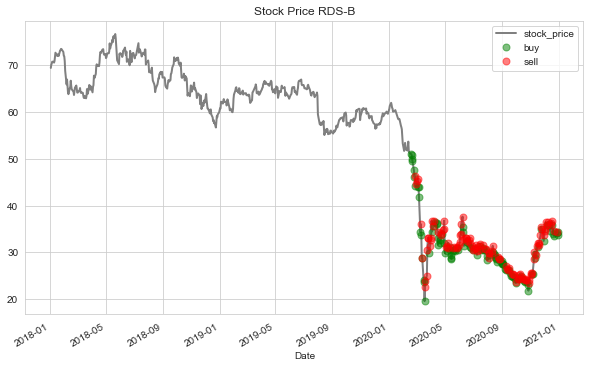

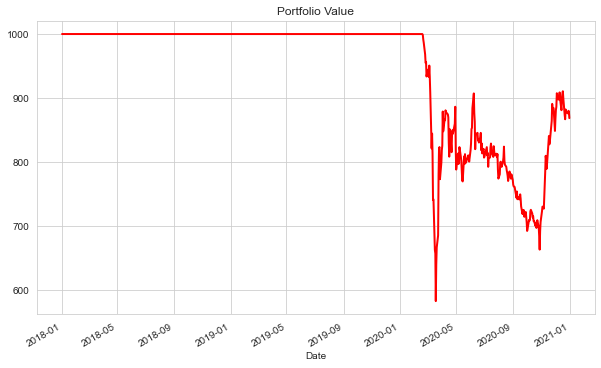

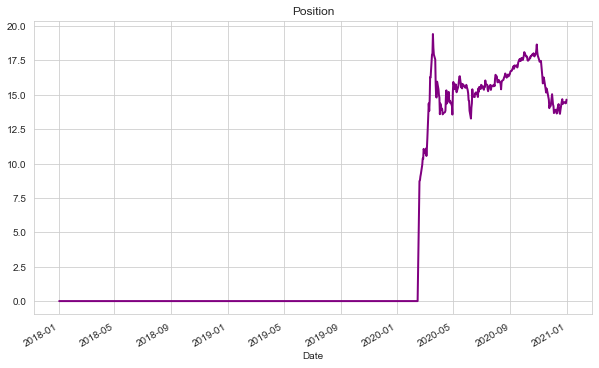

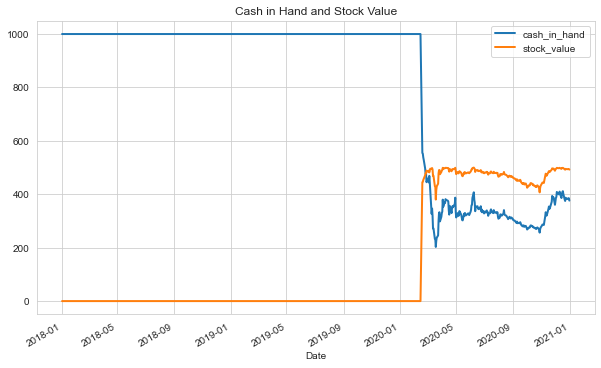

In [7]:
#test

mode = 'test'

portfolio_value = []


with open(f'scaler/{stock_name}.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
env = StockEnv(test_data, capital)
agent.epsilon = 0
agent.load(f'state_dict/{stock_name}.npz')



t0 = datetime.now()
val = play_one_episode(agent, env, mode, scaler)
dt = datetime.now() - t0
print(f"episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
portfolio_value.append(val['portfolio_value'][-1])
    
print(f"Sell: {env.sell_buy.count('sell')} times, Buy: {env.sell_buy.count('buy')} times")



result = pd.DataFrame(val)
result.index = test_data.index

def marker_buy(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'buy':
        return price
    else:
        return np.nan
    
def marker_sell(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'sell':
        return price
    else:
        return np.nan
    
result['marker_buy'] = result[['stock_price', 'sell_buy']].apply(marker_buy, axis=1);
result['marker_sell'] = result[['stock_price', 'sell_buy']].apply(marker_sell, axis=1);

result['stock_price'].plot(figsize=(10,6), c='grey', lw=2);
result['marker_buy'].plot(style='o', ms=7, label='buy', c='g', alpha=0.5);
result['marker_sell'].plot(style='o', ms=7, label='sell', c='r', alpha=0.5);
plt.title('Stock Price '+ stock_name)
plt.legend();
plt.show()



result['portfolio_value'].plot(figsize=(10,6), c='r', lw=2);
plt.title('Portfolio Value');
plt.show()

result['stock_owned'].plot(figsize=(10,6), c='purple', lw=2);
plt.title('Position')
plt.show()

result[['cash_in_hand', 'stock_value']].plot(figsize=(10,6), lw=2);
plt.title('Cash in Hand and Stock Value');
plt.show()

In [8]:


def CAGR(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    n = len(df)/252
    cagr = (df['cumulative_ret'][-1])**(1/n) - 1
    return cagr

def volatility(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    vol = df['daily_ret'].std() * np.sqrt(252)
    return vol


def sharpe(DF, rf):
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

def max_dd(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    df['cum_roll_max'] = df['cumulative_ret'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cumulative_ret']
    df['drawdown_pct'] = df['drawdown']/df['cum_roll_max']
    max_dd = df['drawdown_pct'].max()
    return max_dd

def calmer(DF):
    df = DF.copy()
    clmr = CAGR(df)/max_dd(df)
    return clmr



print(f'Stock name: {stock_name}')
print(f'Start: {result.index[0]}  End: {result.index[-1]}')
print(f'Compound Annual Growth Rate: {CAGR(result)*100:.2f} %')
print(f'Volatility: {volatility(result):.4f}')
print(f'shape ratio: {sharpe(result, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(result)*-100:.2f} %')
print(f'Calmar ratio: {calmer(result):.4f}')
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print('Comparing with Adj close')
print(f'Compound Annual Growth Rate (Adj close): {CAGR(test_data)*100:.2f} %')
print(f'Volatility (benchmark): {volatility(test_data):.4f}')
print(f'shape ratio: {sharpe(test_data, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(test_data)*-100:.2f} %')
print(f'Calmar ratio (benchmark): {calmer(test_data):.4f}')

Stock name: RDS-B
Start: 2018-01-02 00:00:00  End: 2020-12-31 00:00:00
Compound Annual Growth Rate: -4.58 %
Volatility: 0.2303
shape ratio: -0.2467
Maximun drawdown: -41.69 %
Calmar ratio: -0.1099
-----------------------------------------------------------
-----------------------------------------------------------
Comparing with Adj close
Compound Annual Growth Rate (Adj close): -21.48 %
Volatility (benchmark): 0.4185
shape ratio: -0.5396
Maximun drawdown: -74.47 %
Calmar ratio (benchmark): -0.2885


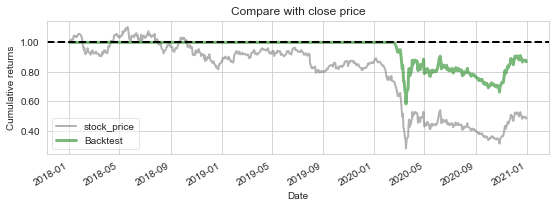

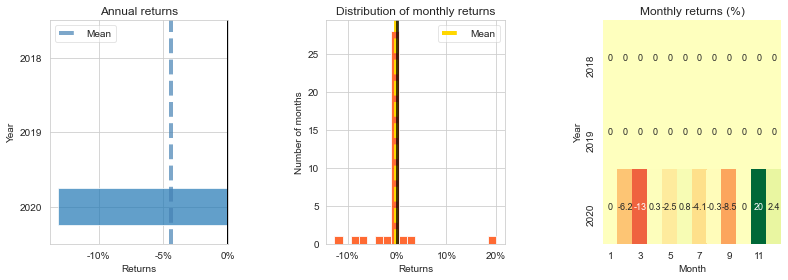

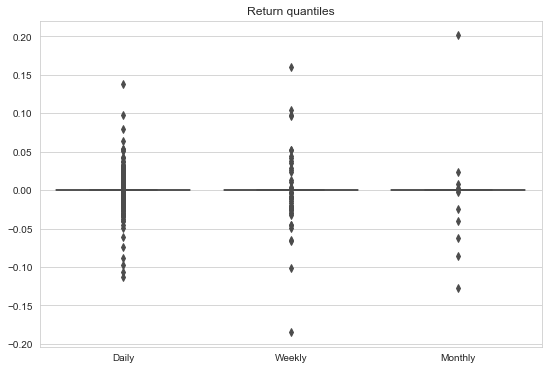

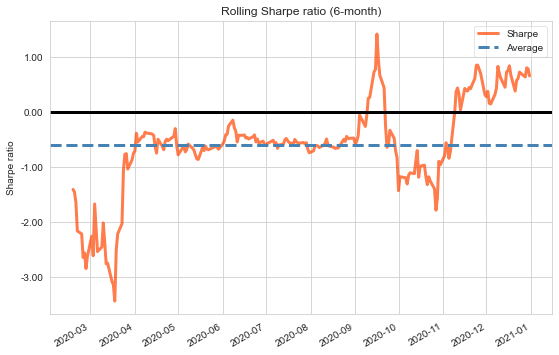

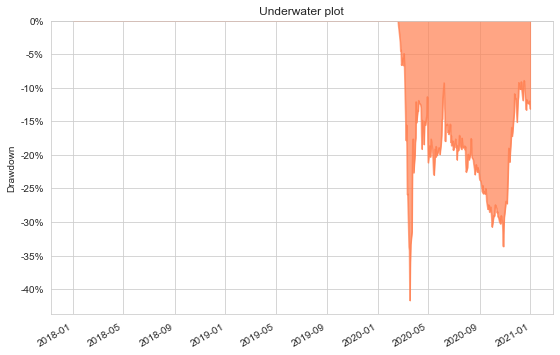

In [11]:


bt_returns = result['portfolio_value'].pct_change()
price = result['stock_price'].pct_change()



plt.figure(figsize=(9,6));
plt.subplot(2,1,1);
pf.plotting.plot_rolling_returns(bt_returns, price);
plt.title('Compare with close price');
plt.show()

fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(12,4)

plt.figure(figsize=(9,6))
pf.plot_return_quantiles(bt_returns);



plt.figure(figsize=(9,6))
pf.plot_rolling_sharpe(bt_returns);

plt.figure(figsize=(9,6))
pf.plot_drawdown_underwater(bt_returns);

score = (sharpe(result, 0.011) - sharpe(test_data, 0.011))*10
ret = ((result['portfolio_value'][-1] - result['portfolio_value'][0])/result['portfolio_value'][0]) * 100
with open(f'score/{stock_name}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([stock_name, industry,score, ret], f)
    
    
result.to_csv(f'../data/{stock_name}.csv')